<h1 align="center">Predicting suicide rates based on supposed risk factors</h1> 

![title](redsui.jpg)

Mental health is a prevalent problem in today's world. Being able to predict the percentage of a population in a region who will commit suicide could lead to more money for support being put in place in those regions and for those most at risk.

I have looked at some of the risk factors for suicide listed on mentalhealth.org (https://www.mentalhealth.org.uk/a-to-z/s/suicide) and have chosen to investigate whether unemployment, alcohol consumption, poverty, location and murder rates are able to predict suicide rates. I will take data between 2000 and 2016 one because that keeps the predictions relevant to this year and 2) because lots of data from before these years is missing. 

[Gathering and preprocessing the data](#Gathering_and_preprocessing_the_data)

[Combining the dataframes](#Combining_the_dataframes)

[Looking at and dealing with missing data](#Looking_at_and_dealing_with_missing_data)

[Exploring the data](#Exploring_the_data)

[Let's start modelling!](#Lets_start_modelling)

<a id='Gathering_and_preprocessing_the_data'></a>

In [1]:
# Predicting suicide rates based on supposed risk factors#Invite everyone to the data science par-tay

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from ipywidgets import widgets

# Gathering and preprocessing the data

In [2]:
#Load all of the data
unemployment_percentage = pd.read_csv("long_term_unemployment_rate_percent (1).csv")
poverty_percentage = pd.read_csv("alternative_poverty_percent_below_nationally_defined_poverty.csv")
murders_per_100000 = pd.read_csv("murder_per_100000_people.csv")
alcohol_per_capita = pd.read_csv("data.csv")
alcohol_per_capita_2 = pd.read_csv("data (1).csv")
suicide_per_10000 = pd.read_csv("suicide_per_100000_people (1).csv")


In [3]:
#Have a look at some of the data

unemployment_percentage.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.50,4.910,5.67,5.28,5.30,5.53,5.76,6.09,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.15,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.56,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.88,0.925,1.22,1.11,1.28,1.04,1.22,NaN,NaN,1.14
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.690,6.77,6.46,5.80,NaN,7.15,7.11,5.4,NaN


In [4]:
#The alcohol datasets were taken from a different source and so are formatted differently. I'll play around with the 
#csv file to get it into the same format as the others to make things run more smoothly. 
alcohol_per_capita.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).1","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).2","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).3","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).4","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).5","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).6"
0,Country,Data Source,Beverage Types,2016.00,2015.00,2014.00,2013.00,2012.00,2011.00,2010.00
1,Afghanistan,Data source,All types,NaN,0.02,0.03,0.03,0.04,0.04,0.03
2,Albania,Data source,All types,5.07,4.77,4.81,5.06,5.43,5.65,5.53
3,Algeria,Data source,All types,0.56,0.56,0.56,0.54,0.49,0.44,0.39
4,Andorra,Data source,All types,10.06,9.97,9.95,9.78,10.06,10.31,10.64


In [5]:
# Funtion to modify alcohol datasets so that they're in the same format as the others
#
#Drop unecessary columns
#Adjust the headers to match other datasets
#Drop the first row (now a duplicate of header)

def modify_alcohol_databases(data):
    data = data.drop(["Unnamed: 1", "Unnamed: 2"], axis = "columns")

    headers = ["country"]
    for header_names in data.iloc[0][1:]:
        headers.append(str(int(header_names)))

    data.iloc[0] = headers
    data.columns = data.iloc[0]
    data = data.drop(data.index[0])
    return data


In [6]:
alcohol_per_capita = modify_alcohol_databases(alcohol_per_capita)
alcohol_per_capita_2 = modify_alcohol_databases(alcohol_per_capita_2)

#Merge the two alcohol datasets together 
alcohol_per_capita_full = pd.merge(alcohol_per_capita, alcohol_per_capita_2, on=["country"], how='outer')

#Check everything's okay
alcohol_per_capita_full.head()

,country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,NaN,0.02,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01,0.01,0,0
1,Albania,5.07,4.77,4.81,5.06,5.43,5.65,5.53,6.04,5.82,5.76,5.46,5.3,4.67,4.43,4.01,4.71,3.98
2,Algeria,0.56,0.56,0.56,0.54,0.49,0.44,0.39,0.48,0.43,0.39,0.43,0.55,0.52,0.39,0.43,0.27,0.32
3,Andorra,10.06,9.97,9.95,9.78,10.06,10.31,10.64,10.8,10.97,11.53,12.03,11.96,10.8,10.97,11.53,12.03,11.96
4,Angola,4.7,5.65,9,8.02,8.14,7.86,7.67,6.89,6.9,6.22,5.44,4.68,3.39,2.88,2.62,2.45,1.77


In [7]:
# Only keep years after 2000 from the databases - alcohol database is only from 2000 so no need to i

def get_pre_2000_indexes(data):
    less_than_2000_column_indexes = []
    for column_name in data.columns.values[1:]: #don't include 'country' column
        if (int(column_name) < 2000):
            less_than_2000_column_indexes.append(data.columns.get_loc(column_name))
    data = data.drop(data.columns[less_than_2000_column_indexes], axis="columns")
    return data

In [8]:
unemployment_percentage = get_pre_2000_indexes(unemployment_percentage)
poverty_percentage = get_pre_2000_indexes(poverty_percentage)
murders_per_100000 = get_pre_2000_indexes(murders_per_100000)
alcohol_per_capita_full = get_pre_2000_indexes(alcohol_per_capita_full)
suicide_per_10000 = get_pre_2000_indexes(suicide_per_10000)


Looking at all the data, it seems as though all of the dataframes are in the same format with the rows sorted by countries and columns as the years so I will need to re-arrange them all and combine them. However, before I do this, I am going to look at the mising values of each data files. I predict that certain countries will have lots of missing data rather than some years having missing data for lots of countries. I will investigate this and if this is the case, I will drop the countries with a substantial amount of missing data. 

In [9]:
poverty_percentage.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,35.8,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,25.4,NaN,NaN,18.5,NaN,NaN,12.4,NaN,NaN,NaN,14.3,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3,NaN


In [10]:
alcohol_per_capita_full.head()

,country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,NaN,0.02,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01,0.01,0,0
1,Albania,5.07,4.77,4.81,5.06,5.43,5.65,5.53,6.04,5.82,5.76,5.46,5.3,4.67,4.43,4.01,4.71,3.98
2,Algeria,0.56,0.56,0.56,0.54,0.49,0.44,0.39,0.48,0.43,0.39,0.43,0.55,0.52,0.39,0.43,0.27,0.32
3,Andorra,10.06,9.97,9.95,9.78,10.06,10.31,10.64,10.8,10.97,11.53,12.03,11.96,10.8,10.97,11.53,12.03,11.96
4,Angola,4.7,5.65,9,8.02,8.14,7.86,7.67,6.89,6.9,6.22,5.44,4.68,3.39,2.88,2.62,2.45,1.77


<a id='Combining_the_dataframes'></a>

## Combining the dataframes

I want the dataframes to be able to combine to be in the format:
year - country - rest of variables

so I need to melt each dataframe so that it is of the form 
year - country - variable

and then I will be able to combine them. 

In [11]:
unemployment_percentage = pd.melt(unemployment_percentage, id_vars=['country']).rename(columns={'variable':'year','value': "unemployment_percentage"}).sort_values(by=["country", "year"]).reset_index().drop("index", axis="columns")


In [12]:
unemployment_percentage.head()

,country,year,unemployment_percentage
0,Albania,2000,NaN
1,Albania,2001,NaN
2,Albania,2002,NaN
3,Albania,2003,NaN
4,Albania,2004,NaN


In [13]:
#Melting the rest of the dataframes

poverty_percentage = pd.melt(poverty_percentage, id_vars=['country']).rename(columns={'variable':'year','value': "poverty_percentage"}).sort_values(by=["country", "year"]).reset_index().drop("index", axis="columns")
murders_per_100000 = pd.melt(murders_per_100000, id_vars=['country']).rename(columns={'variable':'year','value': "murders_per_100000"}).sort_values(by=["country", "year"]).reset_index().drop("index", axis="columns")
alcohol_per_capita_full = pd.melt(alcohol_per_capita_full, id_vars=['country']).rename(columns={0:"year", "value": "alcohol_per_capita"}).sort_values(by=["country", "year"]).reset_index().drop("index", axis="columns")
suicide_per_10000= pd.melt(suicide_per_10000, id_vars=['country']).rename(columns={'variable':'year','value': "suicide_per_10000"}).sort_values(by=["country", "year"]).reset_index().drop("index", axis="columns")
    

In [14]:
poverty_percentage.tail()

,country,year,poverty_percentage
2425,Zimbabwe,2013,NaN
2426,Zimbabwe,2014,NaN
2427,Zimbabwe,2015,NaN
2428,Zimbabwe,2016,NaN
2429,Zimbabwe,2017,NaN


In [15]:
#Combine the dataframes where country and year are the same

merge1 = pd.merge(unemployment_percentage, poverty_percentage, on=["country", "year"], how='outer').sort_values(by=["country", "year"])
merge2 = pd.merge(merge1, murders_per_100000, on=["country", "year"], how='outer').sort_values(by=["country", "year"])
merge3 = pd.merge(merge2, alcohol_per_capita_full, on=["country", "year"], how='outer').sort_values(by=["country", "year"])
full_data = pd.merge(merge3, suicide_per_10000, on=["country", "year"], how='outer').sort_values(by=["country", "year"])


In [16]:
#Check everything is successfully merged

full_data.head()

,country,year,unemployment_percentage,poverty_percentage,murders_per_100000,alcohol_per_capita,suicide_per_10000
0,Afghanistan,2000,NaN,NaN,NaN,0,NaN
1,Afghanistan,2001,NaN,NaN,NaN,0,NaN
2,Afghanistan,2002,NaN,NaN,NaN,0.01,NaN
3,Afghanistan,2003,NaN,NaN,NaN,0.01,NaN
4,Afghanistan,2004,NaN,NaN,NaN,0.02,NaN


In [17]:
#Check that the size of the dataset looks reasonable. 

print("The length of the unemployment dataset was {0}, the length of the suicide dataset was {1} and the length of the full dataset is {2}. This seems reasonable.".format(len(unemployment_percentage), len(suicide_per_10000), len(full_data)))

The length of the unemployment dataset was 2178, the length of the suicide dataset was 1768 and the length of the full dataset is 3960. This seems reasonable.


<a id='Looking_at_and_dealing_with_missing_data'></a>

# Looking at and dealing with missing data

In [18]:
def missing_values_columns(data): 
    number_of_missing_values = data.isnull().sum()
    percentage_missing = (data.isnull().sum())/data.isnull().count()
    missing_values_table = pd.concat([percentage_missing, number_of_missing_values], axis=1, keys=["Percentage missing", "Number of missing values"])
    return missing_values_table.sort_values("Percentage missing", ascending=False)

def missing_values_rows(data): 
    number_of_missing_values = data.isnull().sum(axis="columns")
    percentage_missing = (data.isnull().sum(axis="columns"))/data.isnull().count(axis="columns")
    missing_values_table = pd.concat([percentage_missing, number_of_missing_values], axis=1, keys=["Percentage missing", "Number of missing values"])
    return missing_values_table.sort_values("Percentage missing", ascending=False)

In [19]:
missing_values_columns(full_data)

,Percentage missing,Number of missing values
poverty_percentage,0.815152,3228
murders_per_100000,0.801010,3172
suicide_per_10000,0.797980,3160
unemployment_percentage,0.700000,2772
alcohol_per_capita,0.209343,829
country,0.000000,0
year,0.000000,0


In [20]:
len(full_data)

3960

In [21]:
full_data_copy = full_data.copy()
full_data_copy = full_data_copy.transpose()

In [22]:
#delete instances which have more than 40% missing data
full_data_copy = full_data_copy.dropna(thresh=0.6*len(full_data_copy), axis="columns")

In [23]:
missing_values_rows(full_data_copy)

,Percentage missing,Number of missing values
poverty_percentage,0.596215,567
murders_per_100000,0.193481,184
suicide_per_10000,0.189274,180
unemployment_percentage,0.126183,120
alcohol_per_capita,0.117771,112
country,0.000000,0
year,0.000000,0


In [24]:
len(full_data_copy.columns)

951

In [25]:
full_data_copy = full_data_copy.transpose()
full_data_copy.dtypes

country                    object
year                       object
unemployment_percentage    object
poverty_percentage         object
murders_per_100000         object
alcohol_per_capita         object
suicide_per_10000          object
dtype: object

In [26]:
full_data_copy["country"] = full_data_copy["country"].astype("category")

In [27]:
numerical_columns = ["year", "unemployment_percentage", "murders_per_100000", "poverty_percentage", "alcohol_per_capita", "suicide_per_10000"]

In [28]:
for columns in numerical_columns:
    full_data_copy[columns] = full_data_copy[columns].astype("float")

In [29]:
full_data_copy.dtypes

country                    category
year                        float64
unemployment_percentage     float64
poverty_percentage          float64
murders_per_100000          float64
alcohol_per_capita          float64
suicide_per_10000           float64
dtype: object

## Impute the missing values

The poverty percentage feature has a high number of missing data (~60%), so I will drop this feature. The rest of the missing values are between 10% and 20% so I will impute these values using the average value of the feature for that country. 

I am also going to drop all the instances which don't have a suicide rate. Suicide rate is what I'm trying to predict, so it seesms counter-intuitive to build a model based of imputed guesses of suicide rate. 

In [30]:
#Drop poverty percentage
full_data_copy = full_data_copy.drop("poverty_percentage", axis="columns")
full_data_copy.head()

,country,year,unemployment_percentage,murders_per_100000,alcohol_per_capita,suicide_per_10000
18,Albania,2000.0,NaN,3.96,3.98,1.88
19,Albania,2001.0,NaN,7.58,4.71,4.04
20,Albania,2002.0,NaN,7.40,4.01,4.53
21,Albania,2003.0,NaN,5.53,4.43,4.08
22,Albania,2004.0,NaN,4.29,4.67,4.72


In [31]:
full_data_copy = full_data_copy.dropna(axis=0, subset=["suicide_per_10000"])

In [32]:
full_data_copy.shape

(771, 6)

In [33]:
full_data_copy.groupby("country").nunique().sum()

country                     67
year                       771
unemployment_percentage    625
murders_per_100000         752
alcohol_per_capita         615
suicide_per_10000          702
dtype: int64

90 different countries is too many to encode, so I will take a look at how it correlates with suicide rates and then decide how to lessen the number of different countries. 

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

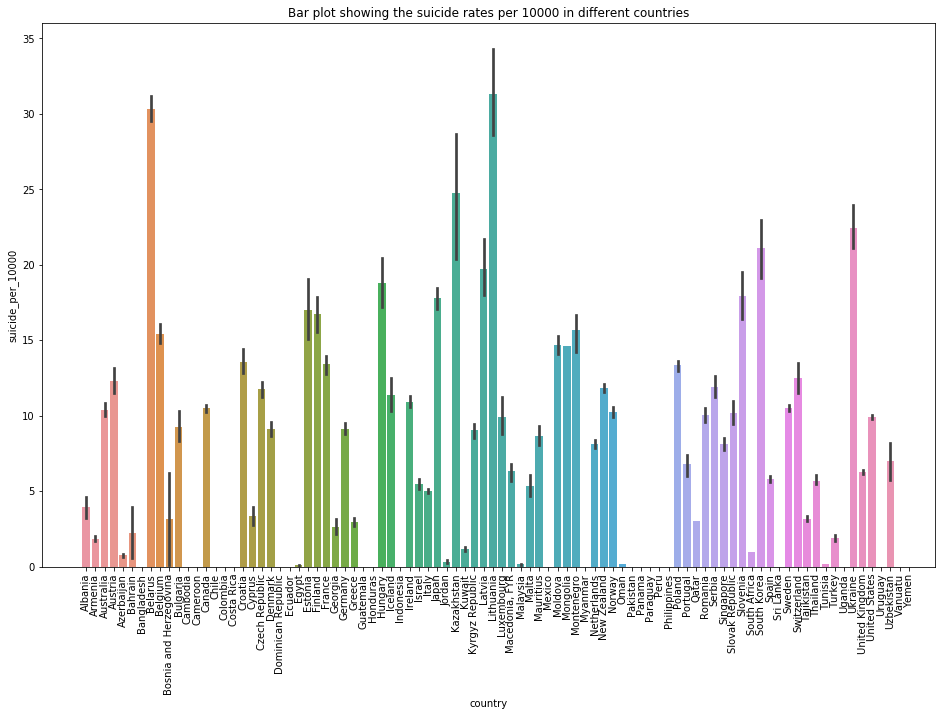

In [34]:
plt.figure(figsize=(16,10))
barCountries = sns.barplot(x = "country", y = "suicide_per_10000", data=full_data_copy[["suicide_per_10000", "country"]])
barCountries.set_xticklabels(barCountries.get_xticklabels(), rotation=90)
barCountries.set_title("Bar plot showing the suicide rates per 10000 in different countries")
barCountries.plot()

Since country seems to have such a large effect on suicide rates, I am going to leave them as they are for now and not change them into continents. 

In [35]:
#Script for changing countries to continents

#countries_to_continents = pd.read_csv("Countries-Continents.csv")
#countries_to_continents.head()
#countries_dictionary = countries_to_continents.set_index("Country").to_dict()["Continent"]
#full_data_copy = full_data_copy.replace(countries_dictionary)
#full_data_copy.tail()

#Now that the countries have been changed to continents, let's impute the missing data. 

In [36]:
#Split into training and test data before impution

y = pd.DataFrame(full_data_copy["suicide_per_10000"])
X = full_data_copy.drop("suicide_per_10000", axis="columns")


In [37]:
full_data_copy.dtypes

country                    category
year                        float64
unemployment_percentage     float64
murders_per_100000          float64
alcohol_per_capita          float64
suicide_per_10000           float64
dtype: object

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

In [39]:
meanImputer = SimpleImputer()
modeImputer = SimpleImputer(strategy="most_frequent")

In [40]:
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()
y_train_imputed = y_train.copy()
y_test_imputed = y_train.copy()

X_train_imputed.iloc[:,1:] = meanImputer.fit_transform(X_train.iloc[:,1:])
X_test_imputed.iloc[:,1:] = meanImputer.transform(X_test.iloc[:,1:])

X_train_imputed.iloc[:,:1] = modeImputer.fit_transform(X_train.iloc[:,:1])
X_test_imputed.iloc[:,:1] = modeImputer.fit_transform(X_test.iloc[:,:1])


In [41]:
missing_values_columns(X_train_imputed)

,Percentage missing,Number of missing values
country,0.0,0
year,0.0,0
unemployment_percentage,0.0,0
murders_per_100000,0.0,0
alcohol_per_capita,0.0,0


No more missing data - perfect!

<a id='Exploring_the_data'></a>

# Exploring the data

Hypotheses:

    - an increase in alcohol per capital is correlated to increased suicide rates
    - an increase in unemployment is correlated to increased suicide rates. 
    - an increase in murders is correlated to increased suicide rates. 
    - location affects suicide rates
    

## Heatmap of numerical data

In [42]:
X_train_imputed.head()

,country,year,unemployment_percentage,murders_per_100000,alcohol_per_capita
3207,Spain,2007.0,1.420000,0.668,11.050000
2518,Norway,2009.0,0.497000,0.604,6.680000
126,Armenia,2002.0,2.273616,2.250,2.930000
2510,Norway,2001.0,0.365000,0.783,5.490000
1787,Kyrgyz Republic,2007.0,2.273616,6.390,8.485394


In [43]:
y_train_imputed.head()

,suicide_per_10000
3207,5.38
2518,10.70
126,2.15
2510,11.30
1787,9.73


In [44]:
all_training_data = pd.concat([X_train_imputed, y_train], axis="columns")

In [45]:
all_training_data.head()

,country,year,unemployment_percentage,murders_per_100000,alcohol_per_capita,suicide_per_10000
3207,Spain,2007.0,1.420000,0.668,11.050000,5.38
2518,Norway,2009.0,0.497000,0.604,6.680000,10.70
126,Armenia,2002.0,2.273616,2.250,2.930000,2.15
2510,Norway,2001.0,0.365000,0.783,5.490000,11.30
1787,Kyrgyz Republic,2007.0,2.273616,6.390,8.485394,9.73


In [46]:
training_data_without_continent = all_training_data.iloc[:,1:]

In [47]:
training_data_without_continent = pd.DataFrame(training_data_without_continent)

In [48]:
training_data_without_continent.dtypes

year                       float64
unemployment_percentage    float64
murders_per_100000         float64
alcohol_per_capita         float64
suicide_per_10000          float64
dtype: object

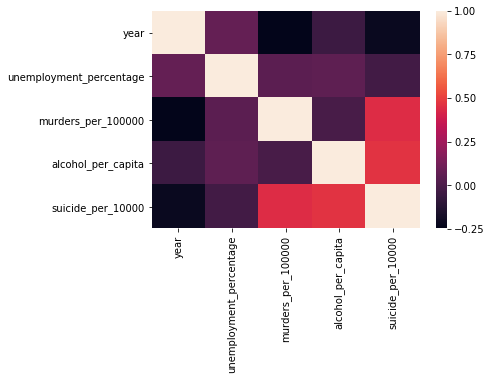

In [49]:
ax = sns.heatmap(training_data_without_continent.corr())

From the heatmap, I can see that there is a positive correlation between suicide rates and alcohol and suicide rates and murders, and that there is low correlation between the other features. This is good as we don't appear to have redundant features from other features being correlated. Let me investigate further. 

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


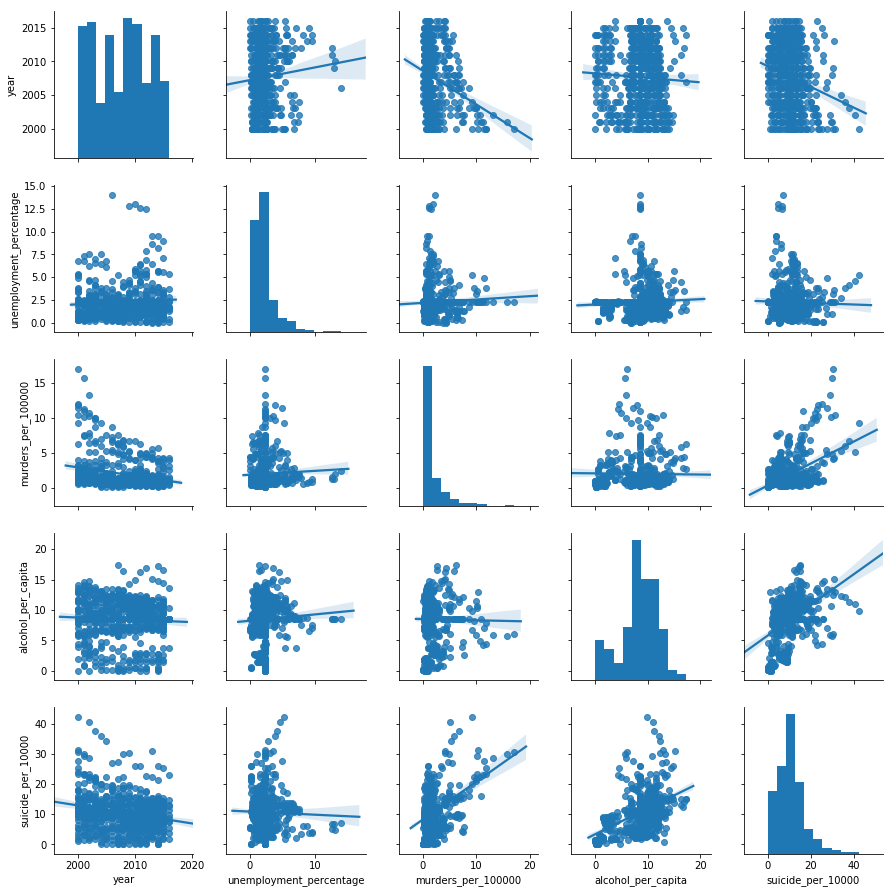

In [50]:
ax2 = sns.pairplot(training_data_without_continent, kind = "reg")

As expected, suicide has a positive correlation with both alcohol per capita. It also has a correlation with murder rates, although not particularly with unemployment rates. Year appears to be correlated most highly with murder rates and slighly with suicide rates - I won't remove anything at this stage but I will keep in mind that I may see how the future model performs without year or unemployment rate (doesn't appear to be correlated with suicide rates at all).

<a id='Lets_start_modelling'></a>

# Let's start modelling! 

We want to be predicting the % of a population who will commit suicide - therefore we need to be performing regression as we want a numerical output. Let's first start off with linear regression since it is the simplest model and often simpler performs better, if not just as well as complex models.  

In [51]:
#Convert the categorical data to numerical via one hot encoding. 

In [52]:
full_country_list = full_data_copy["country"].unique()

In [53]:
#Make sure that one-hot-encoding will result in same number of features 
X_train_imputed["country"] = X_train_imputed["country"].astype("category", categories = full_country_list)
X_test_imputed["country"] = X_test_imputed["country"].astype("category", categories = full_country_list)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
X_train_encoded = pd.get_dummies(X_train_imputed)
X_test_encoded = pd.get_dummies(X_test_imputed)

## Linear Regression

In [69]:
linear1 = LinearRegression()
linear1.fit(X_train_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
linear1.score(X_test_encoded, y_test)

-3.653967604618757e+17

In [64]:
predictions = linear1.predict(X_train_encoded).shape

In [77]:
from sklearn import linear_model

In [79]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train_encoded, y_train)

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [80]:
sgdReg.score(X_train_encoded, y_train)

-2.254829537706239e+28

In [82]:
linear2 = linear_model.Lasso()
linear2.fit(X_train_encoded, y_train)

linear2.score(X_test_encoded, y_test)

0.3726380758574859

In [ ]:
#train the imputer but don't yet impute the values 

#Train a 